In [60]:

import pandas as pd
import os
data = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"

filename=data+input('please key in file name')
df=pd.read_csv(filename)

## ２０fileから一緒になる

In [61]:

"""
data = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"

fame=[]
for i in os.listdir(data):
    if i.endswith('.csv'):
        filedata=data+i
        df = pd.read_csv(filedata)
        fame.append(df)
        resut=pd.concat(fame)
df=resut
df.to_csv("toanreport.csv",index=False)
"""

'\ndata = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"\n\nfame=[]\nfor i in os.listdir(data):\n    if i.endswith(\'.csv\'):\n        filedata=data+i\n        df = pd.read_csv(filedata)\n        fame.append(df)\n        resut=pd.concat(fame)\ndf=resut\ndf.to_csv("toanreport.csv",index=False)\n'

## order dateから切り取る

In [62]:
## cat thang tu cot order date
df['month']=df['Order Date'].str.slice(0,2)
## ナンとorという価値を消える
df.dropna(how="all",inplace=True)
df=df[df['month']!='Or']
print(set(df['month']))


{'09', '07', '03', '10', '05', '08', '02', '11', '04', '01', '12', '06'}


## 一番売れ切った月は

In [63]:
df['Sales']=df['Quantity Ordered'].astype(int)*df['Price Each'].astype(float)
moving_colums=df.pop('Sales')
df.insert(4,'Sales',moving_colums)
#tinh max cua thang
valuses=df.groupby('month')['Sales'].sum()
valuses_sorted_month=valuses.sort_values(ascending=False)
max_month=valuses_sorted_month.iloc[0]
print("一番売れ切った月は{}月に{}回を売った".format(valuses_sorted_month.index[0],max_month))



一番売れ切った月は12月に4613443.34回を売った


## 月のグラフを描く

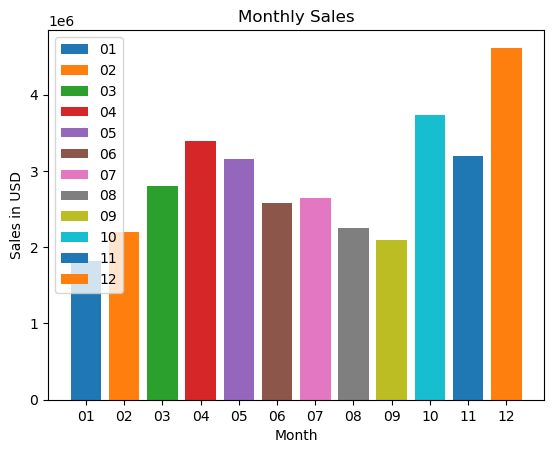

In [64]:
import matplotlib.pyplot as plt

# Tạo danh sách các tháng
months = sorted(set(df['month']))
# Duyệt qua từng tháng và vẽ biểu đồ cho mỗi tháng
for month in months:
    # Lọc dữ liệu cho tháng hiện tại
    data = df[df['month'] == month]
    # Tính tổng doanh thu của tháng
    total_sales = data['Sales'].sum()
     # Vẽ biểu đồ
    plt.bar(x=month, height=total_sales)
    
# Cấu hình trục x
plt.xticks(months)
plt.xlabel('Month')

# Cấu hình trục y
plt.ylabel('Sales in USD')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Monthly Sales')

# Hiển thị legend
plt.legend(months, loc='upper left')

# Hiển thị biểu đồ
plt.show()


##　一番売れ切った町は



In [65]:
adress_city=lambda x:x.split(',')[1]
df['city']=df['Purchase Address'].apply(adress_city)
valusescity=df.groupby('city')['Sales'].sum()
sorted_values_city = valusescity.sort_values(ascending=False)
max_city=sorted_values_city.iloc[0]
print("一番売れ切った町は{}町{}回を売っています".format(sorted_values_city.index[0], max_city))



一番売れ切った町は San Francisco町8262203.91回


## 町の価値を描く


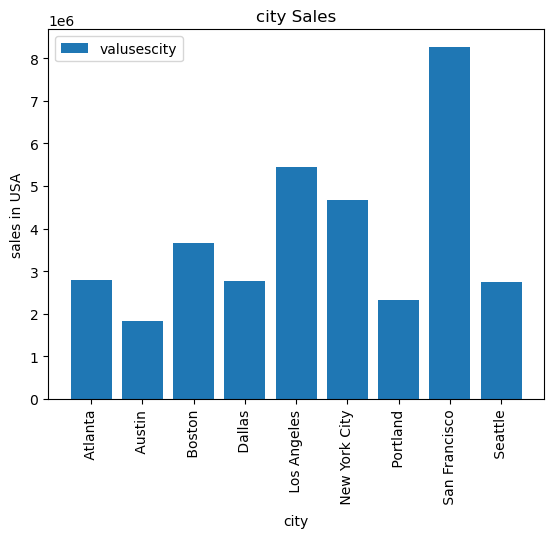

In [66]:
cityes=[city for city,sale in valusescity.items()]
plt.bar(x=cityes,height=valusescity)
plt.xticks(cityes,rotation=90)
plt.xlabel('city')
plt.ylabel('sales in USA')
plt.title('city Sales')
plt.legend(['valusescity'],loc='upper left')
plt.show()

## 広告をするときにいいタイミングは

In [67]:
df['hour'] = pd.to_datetime(df['Order Date']).dt.hour
valusestime = df.groupby('hour')['Sales'].count()
sorted_values = valusestime.sort_values(ascending=False)
max1 = sorted_values.iloc[0]
max2 = sorted_values.iloc[1]
print("max1は {}時{}回".format(sorted_values.index[1], max2))
print("max2は {}時{}回".format(sorted_values.index[0], max1))


max1は 12時12587回
max2は 19時12905回


## 時間のグラフを描く

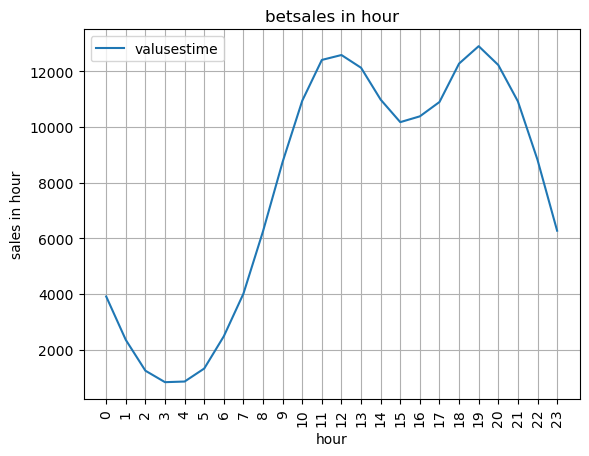

In [68]:
houres=[hour for hour,sale in valusestime.items()]
plt.plot(houres,valusestime)
plt.xticks(houres,rotation=90)
plt.xlabel('hour')
plt.ylabel('sales in hour')
plt.title('betsales in hour')
plt.grid()
plt.legend(['valusestime'],loc='upper left')
plt.show()

## 商品が一緒によく売られていますか

In [69]:
df_dup=df[df['Order ID'].duplicated(keep=False)]
df_dup['all product']=df_dup.groupby('Order ID')['Product'].transform(','.join)
df_dup=df_dup[['Order ID','all product']].drop_duplicates()
df_dup['all product'].value_counts().head(10)



C:\Users\MSI GL63\AppData\Local\Temp\ipykernel_30872\151998100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['all product']=df_dup.groupby('Order ID')['Product'].transform(','.join)


iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: all product, dtype: int64

## 一番売れ切った商品は


In [70]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
all_products=df.groupby('Product')['Quantity Ordered'].sum()
valuse_sorted_produc=all_products.sort_values(ascending=False)
max=valuse_sorted_produc.iloc[0]
print('一番売れ切った商品は{},そして商品が{}品です'.format(valuse_sorted_produc.index[0],max))


一番売れ切った商品はAAA Batteries (4-pack),そして商品が31017.0品です


## 商品のグラフを描く

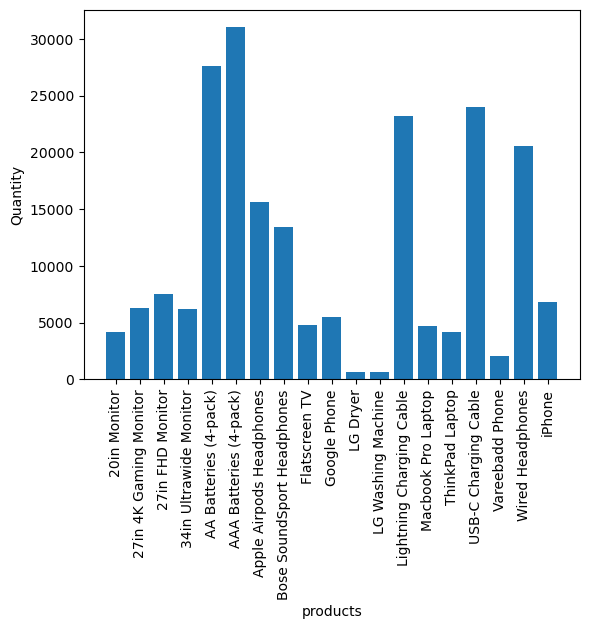

In [71]:
produc_i=[produc for produc,quan in all_products.items()]
plt.bar(x=produc_i,height=all_products)
plt.xticks(produc_i,rotation=90)
plt.xlabel("products")
plt.ylabel('Quantity')
plt.show()

## 一番値段が高い

In [73]:
df['Price Each']= df['Price Each'].astype(float)
price=df.groupby('Product')['Price Each'].mean()
valuse_sorted_price=price.sort_values(ascending=False)
max=valuse_sorted_price.iloc[0]
print('一番値段が高い{},そして値段が{}＄です'.format(valuse_sorted_price.index[0],max),sep="\n")


一番値段が高いMacbook Pro Laptop,そして値段が1700.0＄です


## 商品と値段を描く

C:\Users\MSI GL63\AppData\Local\Temp\ipykernel_30872\76620790.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation=90,size=8)


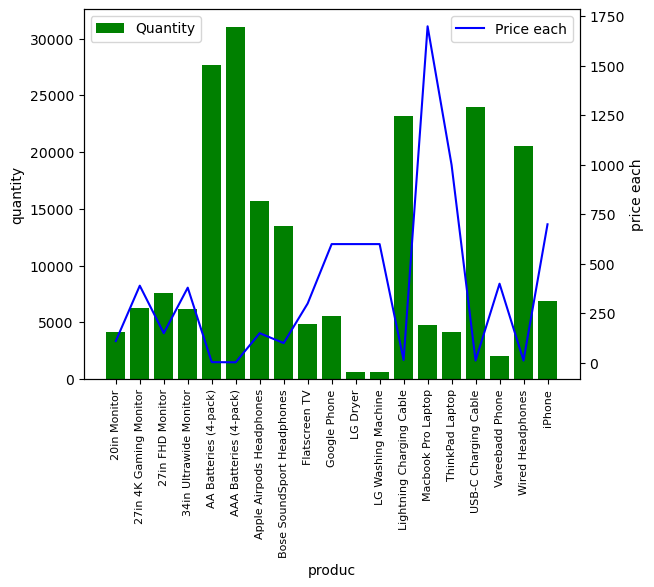

In [74]:
x=produc_i
y1=all_products
y2=price
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(x,y1,color='g')
ax2.plot(x,y2,color='b')
ax1.set_xticklabels(x,rotation=90,size=8)
ax1.set_xlabel('produc')
ax1.set_ylabel('quantity')
ax2.set_ylabel('price each')
ax1.legend(['Quantity'], loc='upper left')
ax2.legend(['Price each'], loc='upper right')
plt.show()